In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Load the data
data = pd.read_csv("yuvin/ACC.csv")

In [4]:
# Read the top 5 element in the data set
data.head()

,1684727531.000000,1684727531.000000,1684727531.000000.1
0,32.0,32.0,32.0
1,29.0,2.0,56.0
2,29.0,1.0,55.0
3,29.0,2.0,57.0
4,29.0,2.0,57.0


In [5]:
# Now drop the first row
data = data.drop(index=0)

In [6]:
data.head()

,1684727531.000000,1684727531.000000,1684727531.000000.1
1,29.0,2.0,56.0
2,29.0,1.0,55.0
3,29.0,2.0,57.0
4,29.0,2.0,57.0
5,28.0,2.0,56.0


In [7]:
len(data)

69876

In [16]:
# Now plot the graph

# create 3d figure
def plot_graph(X, Y, Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    # Plot the line
    ax.plot(X, Y, Z)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Line Plot')

    # Show the plot
    plt.show()

In [8]:
X = np.array(data.iloc[:, 0])
Y = np.array(data.iloc[:, 1])
Z = np.array(data.iloc[:, 2])

In [9]:
def converToTime(i):
    # define base time
    hour = 9
    minutes = 22
    seconds = 11
    
    increment_second = i // 32

    seconds += increment_second     
    minutes += (seconds // 60)
    seconds = seconds % 60
    
    if minutes >= 60:
        minutes = minutes % 60
        hour += 1


    return f"{hour}:{minutes}:{seconds}"

converToTime(0)

'9:22:11'

In [10]:
def print_bunch_32(X, Y, Z):

    file = open("yuvin/ACC_2.txt", "w")
    for i in range(0, len(X)):
        if i % 32 == 0:
            file.writelines(f"----------------------- {converToTime(i)}\n")
        file.writelines(f"{i+1}\t{X[i]}\t{Y[i]}\t{Z[i]}\n")

    file.close()

print_bunch_32(X, Y, Z)

In [29]:
def printOnly1Sec(X, Y, Z, turn):

    # print("5:12")  
    file = open("temp.txt", "w") 
    for i in range(0, len(X)):
        file.writelines(f"{X[i]}\t{Y[i]}\t{Z[i]}\t{turn}\n")

    file.close()
printOnly1Sec(X[19296:19392], Y[19296:19392], Z[19296:19392], 0)

In [14]:
X[4096]

-32.0

In [13]:
def findDetails(X, Y, Z):

    mean = []
    median = []
    mode = []
    sd = []
    qurtile_25 = []
    qurtile_50 = []    
    qurtile_75 = []    
    inter_quartile = []
    median_high = []
    median_low = []
    for i in range(0, len(X), 32):
        x = X[i : i+32]
        y = Y[i : i+32]
        z = Z[i : i+32]

        # print(x, y, z)
        temp = []

        # calculating the mean
        temp.append(np.mean(x))
        temp.append(np.mean(y))
        temp.append(np.mean(z))

        mean.append(temp)

        # calculating the median
        temp = []
        temp.append(np.median(x))
        temp.append(np.median(y))
        temp.append(np.median(z))

        median.append(temp)

        # calculating the mode
        temp = []
        temp.append(stats.mode(x, keepdims=True)[0][0])
        temp.append(stats.mode(y, keepdims=True)[0][0])
        temp.append(stats.mode(z, keepdims=True)[0][0])
        
        mode.append(temp)

        # calculating the standard deviation
        temp = []
        temp.append(np.std(x))
        temp.append(np.std(y))
        temp.append(np.std(z))

        sd.append(temp)

        # calculating the Quartile
        temp = []
        temp.append(np.quantile(x, .25))
        temp.append(np.quantile(y, .25))
        temp.append(np.quantile(z, .25))
        
        qurtile_25.append(temp)

        temp = []
        temp.append(np.quantile(x, .50))
        temp.append(np.quantile(y, .50))
        temp.append(np.quantile(z, .50))
        
        qurtile_50.append(temp)

        temp = []
        temp.append(np.quantile(x, .75))
        temp.append(np.quantile(y, .75))
        temp.append(np.quantile(z, .75))
        
        qurtile_75.append(temp)



    for i in range(len(mean)):

        print("mean: ", mean[i])
        print("median: ", median[i])
        print("mode: ", mode[i])
        print("Qurtile @25: ", qurtile_25[i])
        print("Qurtile @50: ", qurtile_50[i])
        print("Qurtile @75: ", qurtile_75[i])
        # print("Standard deviation: ", sd[i])


findDetails(X, Y, Z)

mean:  [-57.9375, 18.65625, 20.375]
median:  [-58.0, 18.0, 21.0]
mode:  [-58.0, 17.0, 25.0]
Qurtile @25:  [-60.0, 16.0, 16.0]
Qurtile @50:  [-58.0, 18.0, 21.0]
Qurtile @75:  [-55.75, 21.25, 25.0]
mean:  [-59.65625, 19.53125, 15.15625]
median:  [-59.0, 19.0, 15.0]
mode:  [-59.0, 20.0, 15.0]
Qurtile @25:  [-60.0, 18.75, 14.0]
Qurtile @50:  [-59.0, 19.0, 15.0]
Qurtile @75:  [-59.0, 20.0, 16.25]
mean:  [-52.34375, 10.8125, 14.90625]
median:  [-58.0, 20.0, 16.0]
mode:  [-59.0, 19.0, 15.0]
Qurtile @25:  [-60.0, 14.0, 14.0]
Qurtile @50:  [-58.0, 20.0, 16.0]
Qurtile @75:  [-48.75, 26.0, 21.0]
mean:  [-28.90625, -55.59375, 22.78125]
median:  [-26.0, -53.0, 24.0]
mode:  [-18.0, -49.0, 12.0]
Qurtile @25:  [-41.0, -61.75, 12.75]
Qurtile @50:  [-26.0, -53.0, 24.0]
Qurtile @75:  [-19.5, -47.25, 31.5]
mean:  [-20.125, -44.34375, 29.03125]
median:  [-20.0, -55.0, 25.5]
mode:  [-37.0, -57.0, 20.0]
Qurtile @25:  [-30.25, -59.75, 17.75]
Qurtile @50:  [-20.0, -55.0, 25.5]
Qurtile @75:  [-14.25, -40.0, 33.

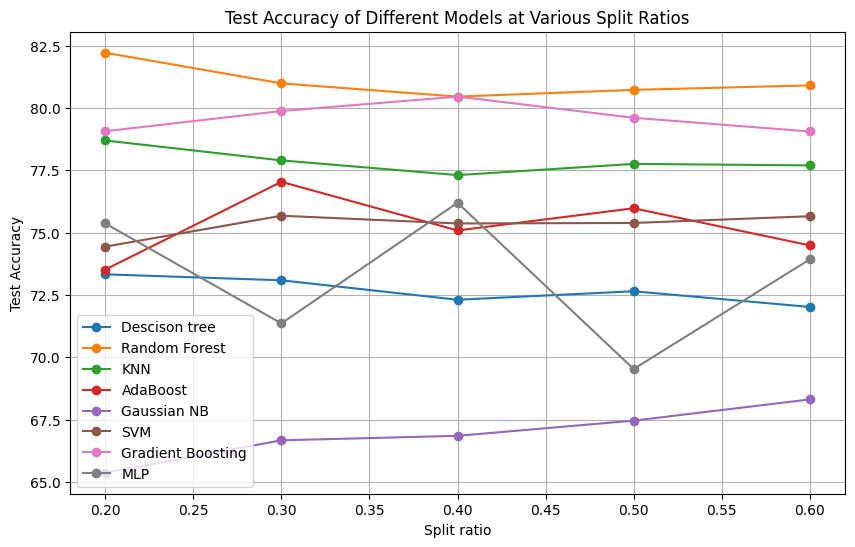

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the table data
data = {
    'Split ratio': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
                    0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Model': ['Descison tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gaussian NB', 'SVM', 'Gradient Boosting', 'MLP'] * 5,
    'Test Accuracy': [73.33, 82.22, 78.70, 73.52, 65.37, 74.44, 79.07, 75.37,
                      73.09, 80.99, 77.90, 77.04, 66.67, 75.68, 79.88, 71.36,
                      72.31, 80.46, 77.31, 75.09, 66.85, 75.37, 80.46, 76.20,
                      72.65, 80.73, 77.76, 75.98, 67.46, 75.39, 79.61, 69.53,
                      72.02, 80.91, 77.70, 74.49, 68.31, 75.66, 79.06, 73.93]
}

df = pd.DataFrame(data)

# Plotting the graph
plt.figure(figsize=(10, 6))

# Extracting data for each model and plotting
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Split ratio'], model_data['Test Accuracy'], marker='o', label=model)

plt.xlabel('Split ratio')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models at Various Split Ratios')
plt.legend()
plt.grid(True)
plt.show()


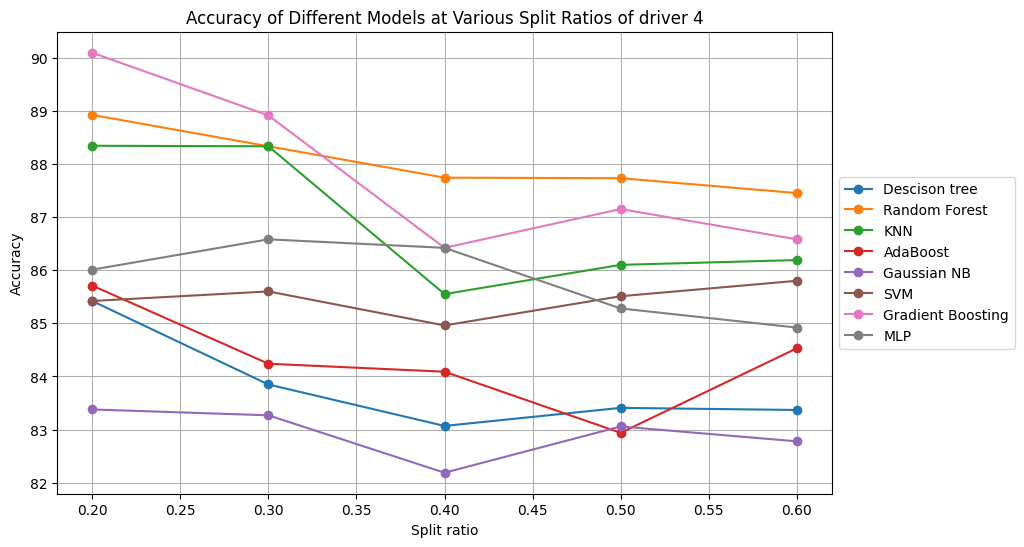

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the table data
data = {
    'Split ratio': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
                    0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Model': ['Descison tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gaussian NB', 'SVM', 'Gradient Boosting', 'MLP'] * 5,
    'Test Accuracy': [85.42, 88.92, 88.34, 85.71, 83.38, 85.42, 90.09, 86.01,
                      83.85, 88.33, 88.33, 84.24, 83.27, 85.60, 88.91, 86.58,
                      83.07, 87.74, 85.55, 84.09, 82.19, 84.96, 86.42, 86.42,
                     83.41, 87.73, 86.10, 82.94, 83.06, 85.51, 87.15, 85.28,
                      83.37, 87.45, 86.19, 84.53, 82.78, 85.80, 86.58, 84.92]
}

df = pd.DataFrame(data)

# Plotting the graph
plt.figure(figsize=(10, 6))

# Extracting data for each model and plotting
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Split ratio'], model_data['Test Accuracy'], marker='o', label=model)

plt.xlabel('Split ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models at Various Split Ratios of driver 4')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.grid(True)
plt.show()


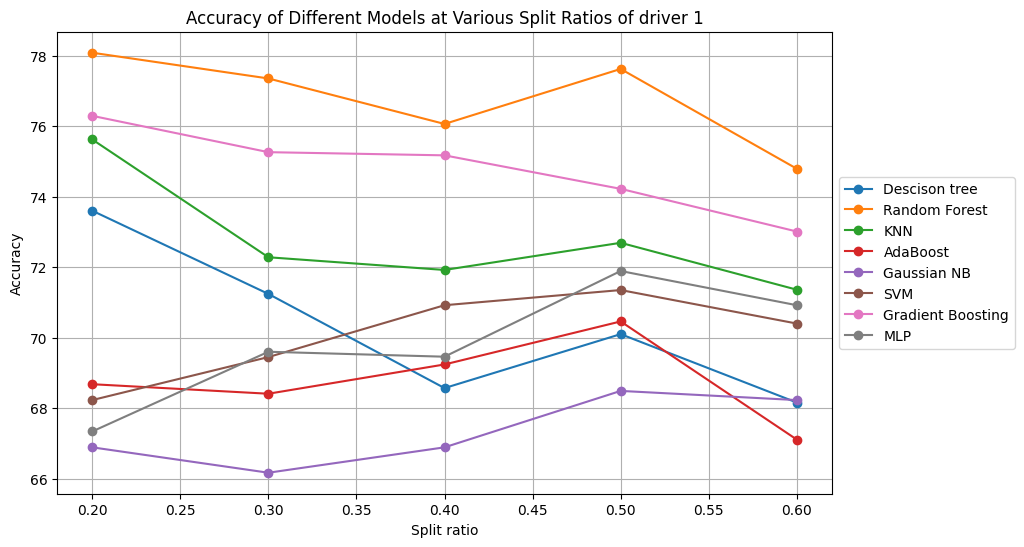

In [7]:
import matplotlib.pyplot as plt

# Data from the table

data = {
    'Split ratio': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
                    0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Model': ['Descison tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gaussian NB', 'SVM', 'Gradient Boosting', 'MLP'] * 5,

    'Test Accuracy': [73.60, 78.08, 75.62, 68.68, 66.89, 68.23, 76.29, 67.34,
                      71.24, 77.35, 72.28, 68.41, 66.17, 69.45, 75.26, 69.60,
                      68.57, 76.06, 71.92, 69.24, 66.89, 70.92, 75.17, 69.46,
                      70.10, 77.62, 72.69, 70.46, 68.49, 71.35, 74.22, 71.89,
                      68.16, 74.79, 71.36, 67.11, 68.23, 70.40, 73.01, 70.92]
}

df = pd.DataFrame(data)

#  Plotting the graph
plt.figure(figsize=(10, 6))

# Extracting data for each model and plotting
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Split ratio'], model_data['Test Accuracy'], marker='o', label=model)

plt.xlabel('Split ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models at Various Split Ratios of driver 1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.grid(True)
plt.show()


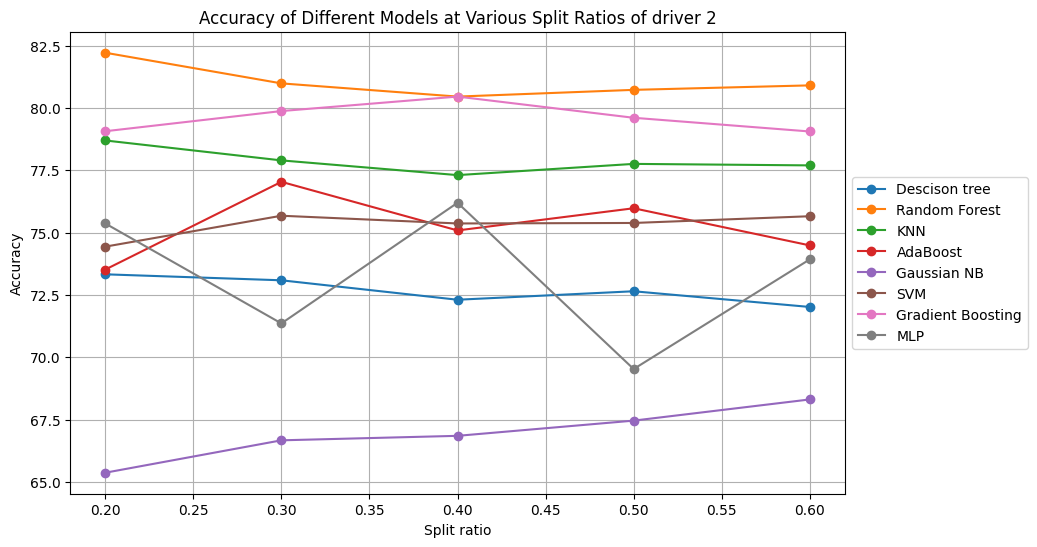

In [8]:
import matplotlib.pyplot as plt

# Data from the table

data = {
    'Split ratio': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
                    0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Model': ['Descison tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gaussian NB', 'SVM', 'Gradient Boosting', 'MLP'] * 5,

    'Test Accuracy': [73.33, 82.22, 78.70, 73.52, 65.37, 74.44, 79.07, 75.37,
                      73.09, 80.99, 77.90, 77.04, 66.67, 75.68, 79.88, 71.36,
                      72.31, 80.46, 77.31, 75.09, 66.85, 75.37, 80.46, 76.20,
                      72.65, 80.73, 77.76, 75.98, 67.46, 75.39, 79.61, 69.53,
                      72.02, 80.91, 77.70, 74.49, 68.31, 75.66, 79.06, 73.93]
}

df = pd.DataFrame(data)

#  Plotting the graph
plt.figure(figsize=(10, 6))

# Extracting data for each model and plotting
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Split ratio'], model_data['Test Accuracy'], marker='o', label=model)

plt.xlabel('Split ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models at Various Split Ratios of driver 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.grid(True)
plt.show()


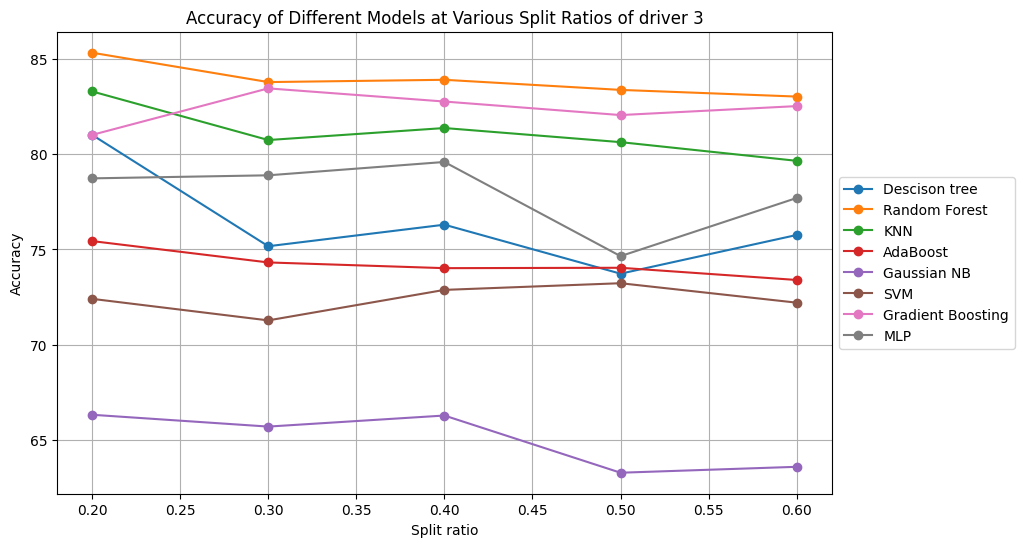

In [9]:
import matplotlib.pyplot as plt

# Data from the table

data = {
    'Split ratio': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
                    0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Model': ['Descison tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gaussian NB', 'SVM', 'Gradient Boosting', 'MLP'] * 5,

    'Test Accuracy': [81.01, 85.32, 83.29, 75.44, 66.33, 72.41, 81.01, 78.73,
                      75.17, 83.78, 80.74, 74.32, 65.71, 71.28, 83.45, 78.89,
                      76.30, 83.90, 81.37, 74.02, 66.29, 72.88, 82.76, 79.59,
                      73.73, 83.37, 80.63, 74.04, 63.29, 73.23, 82.05, 74.65,
                      75.76, 83.02, 79.65, 73.40, 63.60, 72.21, 82.52, 77.70]
}

df = pd.DataFrame(data)

#  Plotting the graph
plt.figure(figsize=(10, 6))

# Extracting data for each model and plotting
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Split ratio'], model_data['Test Accuracy'], marker='o', label=model)

plt.xlabel('Split ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models at Various Split Ratios of driver 3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.grid(True)
plt.show()


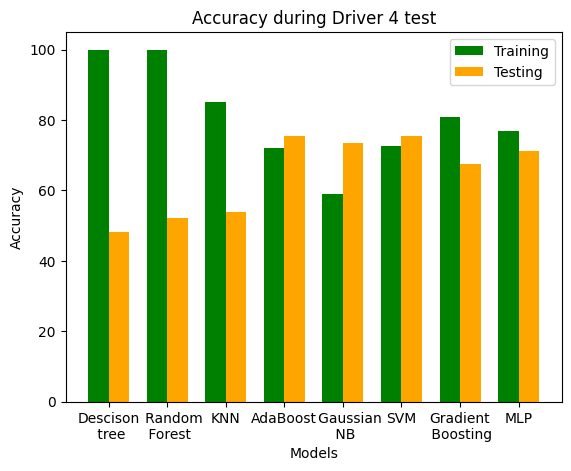

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Descison\n tree', '   Random\n Forest', 'KNN', 'AdaBoost', '   Gaussian\n NB', 'SVM', 'Gradient\n Boosting', 'MLP']
values1 = [100, 99.98, 84.99, 72.13, 58.92, 72.52, 80.88, 76.76]  
values2 = [48.07, 52.04, 53.85, 75.40, 73.36, 75.35, 67.52, 71.20] 

bar_width = 0.35  # Width of each bar
x = np.arange(len(categories))  # X-axis locations for the categories

# Creating the bar plot
plt.bar(x, values1, width=bar_width, label='Training', color='green')
plt.bar(x + bar_width, values2, width=bar_width, label='Testing', color='orange')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy during Driver 4 test')
plt.xticks(x + bar_width / 2, categories)
plt.legend()

# Display the plot
plt.show()